<a href="https://colab.research.google.com/github/Heisbana/Medical-image-analysis/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tarfile

# # Specify the path to the .tar file
# tar_file_path = "/content/drive/MyDrive/Task02_Heart.tar"

# # Specify the path to extract the contents of the .tar file
# extract_path = "/content/drive/MyDrive/segmentation"

# # Open the .tar file
# with tarfile.open(tar_file_path, 'r') as tar_ref:
#     # Extract all the contents of the .tar file to the specified path
#     tar_ref.extractall(extract_path)

# print("Tar file extracted successfully!")


Tar file extracted successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import os
# import gzip
# import shutil

# # Specify the path to the folder containing the .nii.gz files
# folder_path = "/content/drive/MyDrive/segmentation/Task02_Heart/imagesTs"

# # Specify the path to store the extracted .nii files
# output_path = "/content/drive/MyDrive/Heart_dataset/imagesTs"

# # Iterate through each file in the folder
# for file_name in os.listdir(folder_path):
#     file_path = os.path.join(folder_path, file_name)
#     if os.path.isfile(file_path) and file_name.endswith(".nii.gz"):
#         # Construct the output file path by removing the .gz extension
#         output_file_path = os.path.join(output_path, file_name[:-3])

#         try:
#             # Open the .nii.gz file and extract its contents
#             with gzip.open(file_path, 'rb') as gz_file:
#                 with open(output_file_path, 'wb') as nii_file:
#                     shutil.copyfileobj(gz_file, nii_file)
#                     print(f"Extracted {file_name}")
#         except gzip.BadGzipFile:
#             print(f"Skipping {file_name} - Not a valid gzip file")

# print("Extraction completed!")


Extracted la_015.nii.gz
Extracted la_025.nii.gz
Extracted la_013.nii.gz
Extracted la_001.nii.gz
Extracted la_027.nii.gz
Extracted la_006.nii.gz
Extracted la_008.nii.gz
Extracted la_012.nii.gz
Extracted la_028.nii.gz
Extracted la_002.nii.gz
Extraction completed!


In [ ]:
import os
import glob
import torch
#PyTorch is a popular deep learning library that is primarily used for building and training neural networks.
#It provides tools for creating and optimizing machine learning models, including support for GPU acceleration.
import numpy as np
import nibabel as nib
#Nibabel is a library for reading and writing neuroimaging data formats, such as NIfTI (Neuroimaging Informatics Technology Initiative) and Analyze.
#It's commonly used in the field of neuroimaging for processing and analyzing brain imaging data.
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install numpy-stl

In [ ]:
import numpy as np
import nibabel as nib
from skimage import measure         # used for 3D mesh generation
from stl import mesh

# Load the original image and mask images using nibabel
original_img = nib.load('/content/drive/MyDrive/Heart_dataset/imagesTr/la_003.nii')
mask_img = nib.load('/content/drive/MyDrive/Heart_dataset/labelsTr/la_003.nii')

# Get the data arrays from the NIfTI images
img = original_img.get_fdata()
lbl = mask_img.get_fdata()


data_dir = '/content/drive/MyDrive/Heart_dataset'
images = sorted(
    glob.glob(os.path.join(data_dir, "imagesTr/la_*.nii")))
labels = sorted(
    glob.glob(os.path.join(data_dir, "labelsTr/la_*.nii")))

print('No. of images:', len(images), ' labels:', len(labels))

No. of images: 20  labels: 20


In [ ]:
print('\nimg shape:', img.shape, ' lbl shape:', lbl.shape)
print('img intensity min.:', np.min(img), ' max.:', np.max(img), ' unique labels:', np.unique(lbl))


img shape: (320, 320, 130)  lbl shape: (320, 320, 130)
img intensity min.: 0.0  max.: 1999.0  unique labels: [0. 1.]


In [ ]:
!pip install monai
from monai.utils import first, set_determinism

set_determinism(seed=0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.9 MB/s eta 0:00:00


In [ ]:
import os
import glob
import torch
import numpy as np
import nibabel as nib

data_dir = '/content/drive/MyDrive/Heart_dataset'
images = sorted(glob.glob(os.path.join(data_dir, "imagesTr/la_*.nii")))
label_files = sorted(glob.glob(os.path.join(data_dir, "labelsTr/la_*.nii")))

print('No. of images:', len(images), ' labels:', len(label_files))

labels = label_files

# Check if images and labels match correctly
for image_file, label_file in zip(images, labels):
    print("Image:", image_file)
    print("Label:", label_file)

No. of images: 20  labels: 20
Image: /content/drive/MyDrive/Heart_dataset/imagesTr/la_003.nii
Label: /content/drive/MyDrive/Heart_dataset/labelsTr/la_003.nii
Image: /content/drive/MyDrive/Heart_dataset/imagesTr/la_004.nii
Label: /content/drive/MyDrive/Heart_dataset/labelsTr/la_004.nii
Image: /content/drive/MyDrive/Heart_dataset/imagesTr/la_005.nii
Label: /content/drive/MyDrive/Heart_dataset/labelsTr/la_005.nii
Image: /content/drive/MyDrive/Heart_dataset/imagesTr/la_007.nii
Label: /content/drive/MyDrive/Heart_dataset/labelsTr/la_007.nii
Image: /content/drive/MyDrive/Heart_dataset/imagesTr/la_009.nii
Label: /content/drive/MyDrive/Heart_dataset/labelsTr/la_009.nii
Image: /content/drive/MyDrive/Heart_dataset/imagesTr/la_010.nii
Label: /content/drive/MyDrive/Heart_dataset/labelsTr/la_010.nii
Image: /content/drive/MyDrive/Heart_dataset/imagesTr/la_011.nii
Label: /content/drive/MyDrive/Heart_dataset/labelsTr/la_011.nii
Image: /content/drive/MyDrive/Heart_dataset/imagesTr/la_014.nii
Label: /co

In [ ]:
data_dicts = [
    {"image": image_name, "label": label_name}
    for image_name, label_name in zip(images, labels)
]

train_files, val_files, test_files = data_dicts[:10], data_dicts[10:15], data_dicts[-1:]

print('train files:', len(train_files), ' val files:', len(val_files), ' test files:', len(test_files))

train files: 10  val files: 5  test files: 1


In [ ]:
from monai.transforms import (
    AsDiscrete,
    AsDiscreted,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandAffined,
    RandFlipd,
    RandScaleIntensityd,
    RandShiftIntensityd,
    RandSpatialCropd,
    SaveImaged,
    ScaleIntensityRanged,
    Spacingd,
    Invertd,
)
from monai.data import CacheDataset, DataLoader, Dataset, decollate_batch


train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),

        CropForegroundd(keys=["image", "label"], source_key="image"),
        Orientationd(keys=["image", "label"], axcodes="PLS"),
        Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")),

        # Randomly crop a patch from both image and label files
        RandSpatialCropd(
                keys=["image", "label"],
                roi_size=[96, 96, 96],
                random_size=False,
        ),

        # Data augmentation transforms
        RandAffined(
            keys=['image', 'label'],
            mode=('bilinear', 'nearest'),
            prob=1.0, spatial_size=(96, 96, 96),
            rotate_range=(0, 0, np.pi/15),
            scale_range=(0.1, 0.1, 0.1)),
        RandFlipd(keys=["image", "label"], prob=0.25, spatial_axis=0),
        RandFlipd(keys=["image", "label"], prob=0.25, spatial_axis=1),
        RandFlipd(keys=["image", "label"], prob=0.25, spatial_axis=2),
        RandScaleIntensityd(keys="image", factors=0.1, prob=1.0),
        RandShiftIntensityd(keys="image", offsets=0.1, prob=1.0),
        ])

val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),

        CropForegroundd(keys=["image", "label"], source_key="image"),
        Orientationd(keys=["image", "label"], axcodes="PLS"),
        Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")),
    ])

/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


img shape: torch.Size([96, 96, 96]), lbl shape: torch.Size([96, 96, 96])


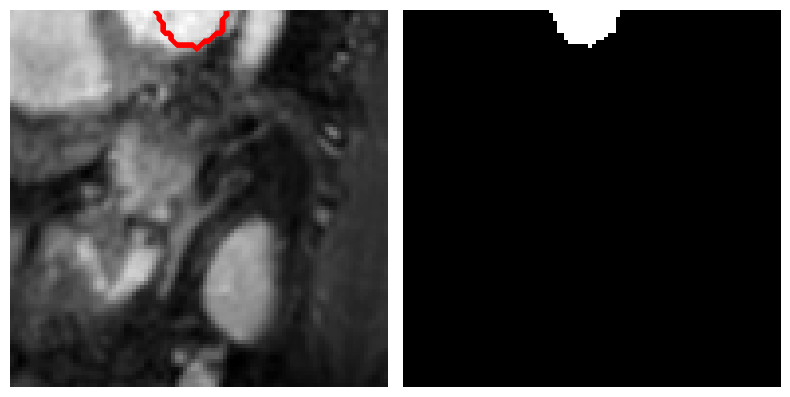

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
sample_ds = Dataset(data=train_files, transform=train_transforms)
sample_dataloader = DataLoader(sample_ds, batch_size=1)
sample_batch = first(sample_dataloader)

img, lbl = sample_batch["image"][0][0], sample_batch["label"][0][0]
print(f"img shape: {img.shape}, lbl shape: {lbl.shape}")

slice_idx = 50
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(img[:,:,slice_idx], cmap='gray')
plt.contour(lbl[:,:,slice_idx], colors='red')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(lbl[:,:,slice_idx], cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from monai.data import pad_list_data_collate

# Create datasets and dataloaders
train_ds = CacheDataset(data=train_files, transform=train_transforms, cache_rate=1.0)
train_loader = DataLoader(train_ds, batch_size=2, shuffle=True, collate_fn=pad_list_data_collate)

val_ds = CacheDataset(data=val_files, transform=val_transforms, cache_rate=1.0)
val_loader = DataLoader(val_ds, batch_size=1, collate_fn=pad_list_data_collate)

Loading dataset: 100%|██████████| 5/5 [00:13<00:00,  2.66s/it]


In [ ]:
from monai.losses import DiceLoss
from monai.metrics import DiceMetric
from monai.networks.nets import UNet
from monai.networks.layers import Norm

device = torch.device("cuda:0")
model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)
loss_function = DiceLoss(to_onehot_y=True, softmax=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-4) #reducing the parameter
dice_metric = DiceMetric(include_background=False, reduction="mean")



In [ ]:
from monai.inferers import sliding_window_inference

# Define hyperparameters
max_epochs = 500
val_interval = 2
best_metric = -1
best_metric_epoch = -1
epoch_loss_values = []
metric_values = []

# Define post-processing transforms
post_pred = Compose([AsDiscrete(argmax=True, to_onehot=2)])
post_label = Compose([AsDiscrete(to_onehot=2)])

# Training loop
for epoch in range(max_epochs):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{max_epochs}")
    model.train()
    epoch_loss = 0
    step = 0
    for batch_data in train_loader:
        step += 1
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(f"{step}/{len(train_ds) // train_loader.batch_size}, train_loss: {loss.item():.4f}")
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)

    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            for val_data in val_loader:
                val_inputs, val_labels = val_data["image"].to(device), val_data["label"].to(device),
                val_outputs = sliding_window_inference(val_inputs, (96, 96, 96), 1, model)

                val_outputs = [post_pred(i) for i in decollate_batch(val_outputs)]
                val_labels = [post_label(i) for i in decollate_batch(val_labels)]

                # compute metric for current iteration
                dice_metric(y_pred=val_outputs, y=val_labels)

            # aggregate the final mean dice result
            metric = dice_metric.aggregate().item()

            # reset the status for next validation round
            dice_metric.reset()

            metric_values.append(metric)
            if metric > best_metric:
                best_metric = metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), "/content/drive/MyDrive/best_metric_model.pth")
                print("saved new best metric model")
            print(
                f"current epoch: {epoch + 1} current mean dice: {metric:.4f}"
                f"\nbest mean dice: {best_metric:.4f} "
                f"at epoch: {best_metric_epoch}"
            )

----------
epoch 1/500
1/5, train_loss: 0.6959
2/5, train_loss: 0.6734
3/5, train_loss: 0.6930
4/5, train_loss: 0.6879
5/5, train_loss: 0.6971
epoch 1 average loss: 0.6894
----------
epoch 2/500
1/5, train_loss: 0.6856
2/5, train_loss: 0.6975
3/5, train_loss: 0.6854
4/5, train_loss: 0.6635
5/5, train_loss: 0.6814
epoch 2 average loss: 0.6827
saved new best metric model
current epoch: 2 current mean dice: 0.0093
best mean dice: 0.0093 at epoch: 2
----------
epoch 3/500
1/5, train_loss: 0.6924
2/5, train_loss: 0.6780
3/5, train_loss: 0.6749
4/5, train_loss: 0.6724
5/5, train_loss: 0.6766
epoch 3 average loss: 0.6789
----------
epoch 4/500
1/5, train_loss: 0.6722
2/5, train_loss: 0.6803
3/5, train_loss: 0.6850
4/5, train_loss: 0.6774
5/5, train_loss: 0.6820
epoch 4 average loss: 0.6794
saved new best metric model
current epoch: 4 current mean dice: 0.0094
best mean dice: 0.0094 at epoch: 4
----------
epoch 5/500
1/5, train_loss: 0.6907
2/5, train_loss: 0.6730
3/5, train_loss: 0.6601
4/5, 

In [ ]:
print(
    f"train completed, best_metric: {best_metric:.4f} "
    f"at epoch: {best_metric_epoch}")

train completed, best_metric: 0.7198 at epoch: 500


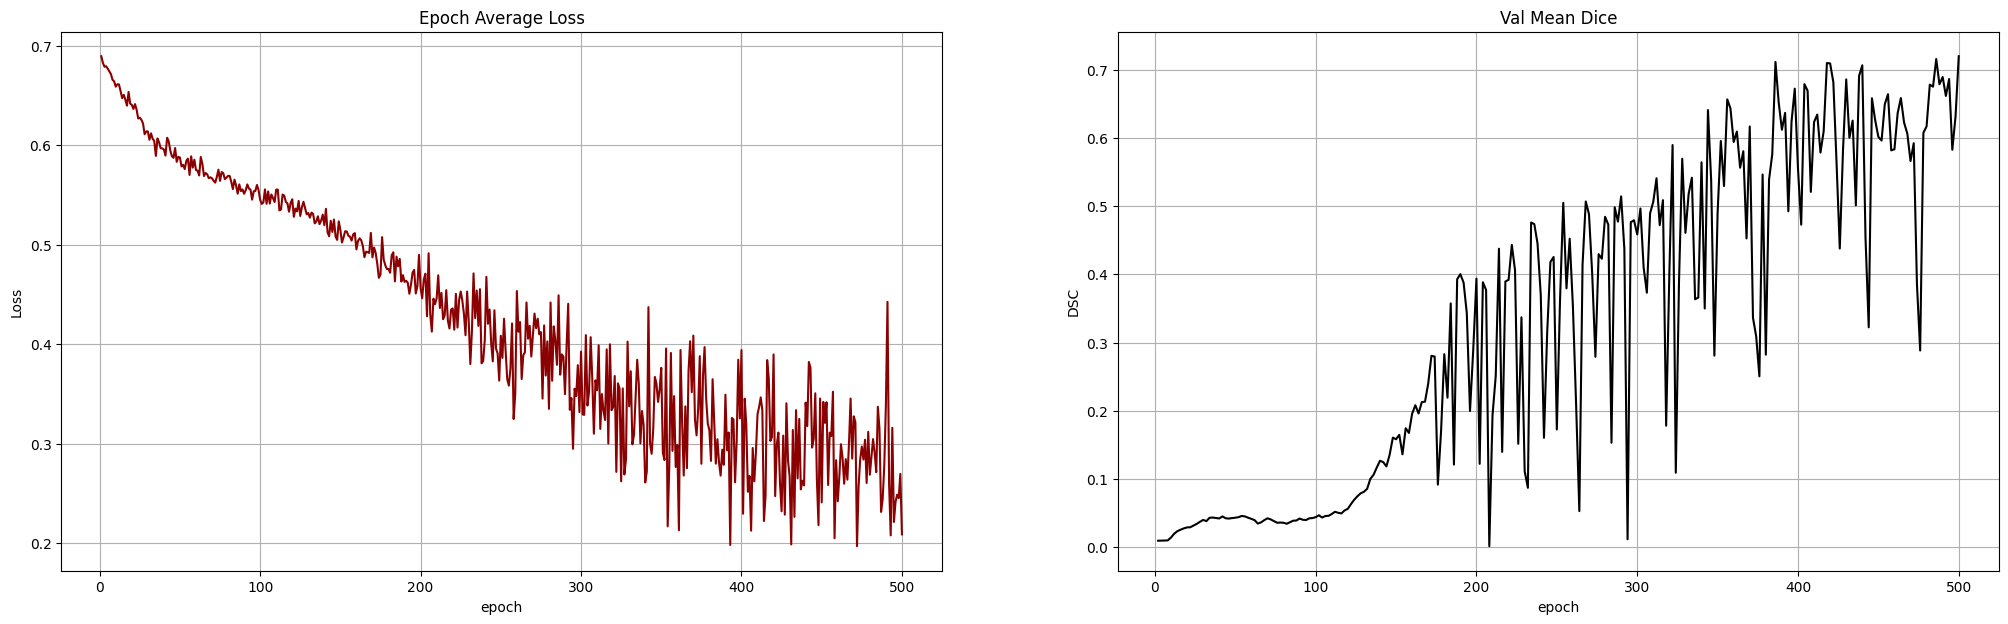

In [ ]:
plt.figure("train", (25,7))
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x = [i + 1 for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.plot(x, y, color='darkred')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title("Val Mean Dice")
x = [val_interval * (i + 1) for i in range(len(metric_values))]
y = metric_values
plt.ylabel("DSC")
plt.xlabel("epoch")
plt.grid(True)
plt.plot(x, y, color='black')
plt.show()

In [ ]:
test_ds = Dataset(data=test_files, transform=val_transforms)
test_loader = DataLoader(test_ds, batch_size=1)

post_transforms = Compose([
    Invertd(
        keys="pred",
        transform=val_transforms,
        orig_keys="image",
        meta_keys="pred_meta_dict",
        orig_meta_keys="image_meta_dict",
        meta_key_postfix="meta_dict",
        nearest_interp=False,
        to_tensor=True,
    ),
    AsDiscreted(keys="pred", argmax=True, to_onehot=2),
    SaveImaged(keys="pred", meta_keys="pred_meta_dict", output_dir="./out", output_postfix="seg", resample=False),
])

2023-12-03 21:52:55,038 INFO image_writer.py:197 - writing: out/la_030/la_030_seg.nii.gz


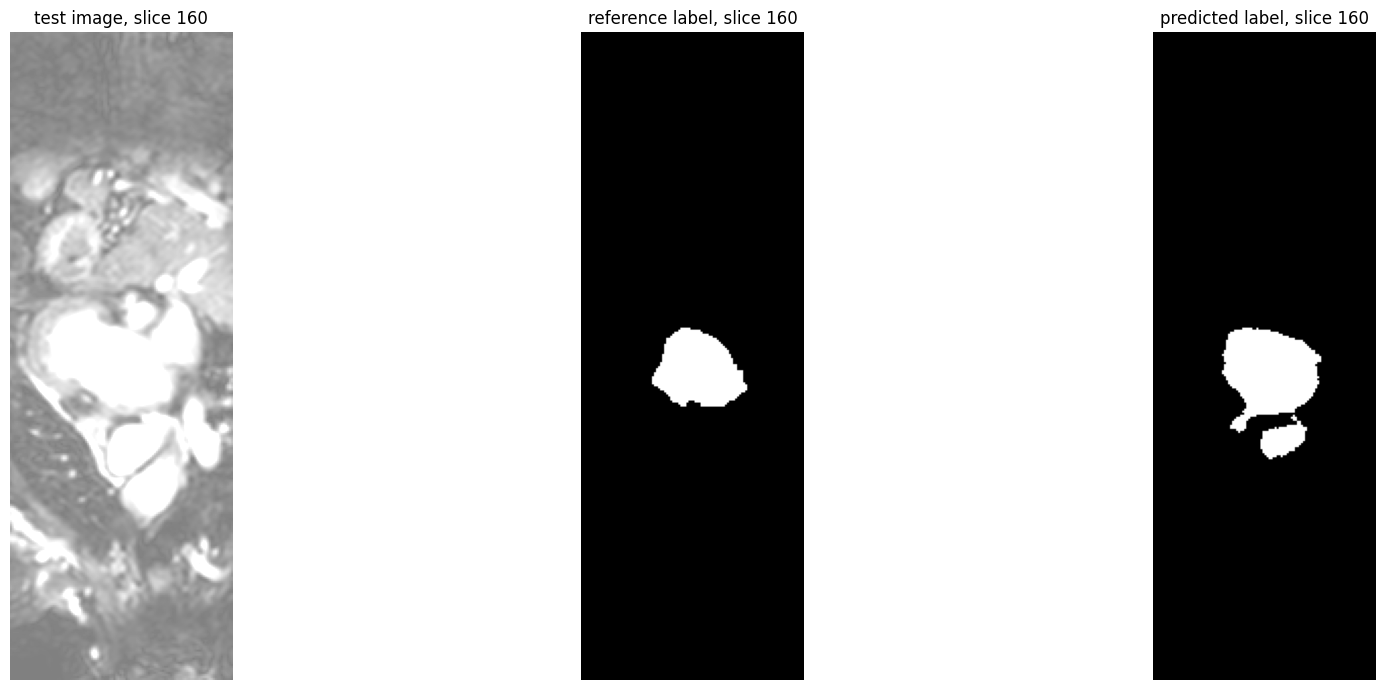

In [ ]:
from monai.transforms import LoadImage
from monai.handlers.utils import from_engine

loader = LoadImage()

model.load_state_dict(torch.load("/content/drive/MyDrive/best_metric_model.pth"))
model.eval()

with torch.no_grad():
    for test_data in test_loader:
        test_inputs = test_data["image"].to(device)
        test_data["pred"] = sliding_window_inference(test_inputs, (96, 96, 96), 1, model, overlap=0.75)

        test_data = [post_transforms(i) for i in decollate_batch(test_data)]
        test_output = from_engine(["pred"])(test_data)

        original_image = loader(test_files[0]['image'])[0] # Load the original image
        original_label = loader(test_files[0]['label'])[0] # Load the original label
        slice_idx = 160

        # Load the first 3D medical image and its corresponding label from the previously sorted lists
        #The load function from the nibabel library is used to load and read medical image data from a fil
        img = nib.load(test_files[0]['image']).get_fdata()  # Load the image data
        lbl = nib.load(test_files[0]['label']).get_fdata()  # Load the label data

        # Print the shapes and statistics of the loaded data

        plt.figure(figsize=(20,7))
        plt.subplot(1, 3, 1)
        plt.axis('off')
        plt.title(f'test image, slice {slice_idx}')
        plt.imshow(img[slice_idx], cmap="gray", vmin=-1000, vmax=1000)
        plt.subplot(1, 3, 2)
        plt.title(f'reference label, slice {slice_idx}')
        plt.axis('off')
        plt.imshow(lbl[slice_idx], cmap="gray")
        plt.subplot(1, 3, 3)
        plt.title(f'predicted label, slice {slice_idx}')
        plt.axis('off')
        plt.imshow(test_output[0].detach().cpu().numpy()[1,slice_idx], cmap="gray") # use index 1 to get the lung class
        plt.tight_layout()
        plt.show()